<!-- Provide a brief justification (3-4 lines) for why this dataset is suit-
able for weather-related analysis and predictions on a global scale. -->

# Data Processing
## Data Loading

In [274]:
# Imports.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [275]:
# Loading the Global Weather Dataset.

df = pd.read_csv('/Users/diegolemos/Masters/ProgrammingForAi/CA/GlobalWeatherRepository.csv')



In [276]:
# Getting the informations from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30291 entries, 0 to 30290
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       30291 non-null  object 
 1   location_name                 30291 non-null  object 
 2   latitude                      30291 non-null  float64
 3   longitude                     30291 non-null  float64
 4   timezone                      30291 non-null  object 
 5   last_updated_epoch            30291 non-null  int64  
 6   last_updated                  30291 non-null  object 
 7   temperature_celsius           30291 non-null  float64
 8   temperature_fahrenheit        30291 non-null  float64
 9   condition_text                30291 non-null  object 
 10  wind_mph                      30291 non-null  float64
 11  wind_kph                      30291 non-null  float64
 12  wind_degree                   30291 non-null  int64  
 13  w

## Reading the data set

In [277]:
# Reading the 5 first rows of the dataset
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [278]:
# Cheking the number of features and observations.
df.shape

(30291, 41)

As we can see there are 30291 observations and 41 features in the dataset.

## Missing Values

In [279]:
# Checking for missing values.

df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

There is no missing values in the dataset.

## Duplicates

In [280]:
# Checking the duplicates.

df.duplicated().sum()

0

The are no duplicated rows.

## Unique Values

In [281]:
# Checking uniques values.
df.nunique()

country                          210
location_name                    248
latitude                         383
longitude                        389
timezone                         190
last_updated_epoch               211
last_updated                    4424
temperature_celsius              489
temperature_fahrenheit           815
condition_text                    34
wind_mph                         147
wind_kph                         147
wind_degree                      360
wind_direction                    16
pressure_mb                       65
pressure_in                      160
precip_mm                        442
precip_in                         53
humidity                          99
cloud                            101
feels_like_celsius               551
feels_like_fahrenheit            949
visibility_km                     60
visibility_miles                  13
uv_index                         143
gust_mph                         441
gust_kph                         662
a

According to the *nunique* function, the amount of countries is 210. However, there are only 195 contries in the world.(Worldometer, 2019)
Considering this, I will perform an analisys in this column. 

In [282]:
# Checking the unique country names.
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Madagascar', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji Islands', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau

I noticed there are same countries written in different languages, for instance "Belgium" and "Bélgica". Thus, I will perform a standardization.

## Standardization

In [283]:
# Creating a dictionary to map inconsistent country names to standard country names

country_standardize_map = {
    "Bélgica": "Belgium",
    "Estonie": "Estonia",
    "Malásia": "Malaysia",
    "Marrocos": "Morocco",
    "Mexique": "Mexico",
    "Polônia": "Poland",
    "Südkorea": "South Korea",
    "Saudi Arabien": "Saudi Arabia",
    "Inde": "India",
    "Jemen": "Yemen",
    "Letonia": "Latvia",
    "Komoren": "Comoros",
    "Польша": "Poland",
    "Турция": "Turkey",
    "كولومبيا": "Colombia",
    "火鸡": "Turkey",
    "USA United States of America": "United States of America",
    "Гватемала": "Guatemala"
}

# Replacing inconsistent country names
df['country'] = df['country'].replace(country_standardize_map)


In [284]:
# Checkinh the amount of unique country names again.
df['country'].nunique()

192

Now, after standardazing the country names, we have the correct amount of countries in the dataset.

In [285]:
# Checking the columns data types.

print(df.dtypes)

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


Based on the information above, I will drop a few columns with either, redundant or irrelevant data for the analysis. For the feature 'last_updated' as its datatype is object, I will convert it to date type. 

## Dropping Columns

In [286]:
# Dropping columns
df = df.drop(['location_name','timezone', 'last_updated_epoch','sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination', 'wind_direction', 'condition_text'], axis=1)

In [287]:
# Reading the 5 first rows of the new dataset
df.head()

,country,latitude,longitude,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
0,Afghanistan,34.52,69.18,2024-05-16 13:15,26.6,79.8,8.3,13.3,338,1012.0,...,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1
1,Albania,41.33,19.82,2024-05-16 10:45,19.0,66.2,6.9,11.2,320,1012.0,...,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1
2,Algeria,36.76,3.05,2024-05-16 09:45,23.0,73.4,9.4,15.1,280,1011.0,...,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1
3,Andorra,42.50,1.52,2024-05-16 10:45,6.3,43.3,7.4,11.9,215,1007.0,...,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1
4,Angola,-8.84,13.23,2024-05-16 09:45,26.0,78.8,8.1,13.0,150,1011.0,...,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10


## Converting Datatype

In [288]:
# Converting the column 'last_updated' to datetype
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [289]:
# Checkint if the datatype of he column 'last_updated' was changed
print(df['last_updated'].dtype)

datetime64[ns]


## Encoding

I will perform an Label Enconding in the 'country' feature. I chose to proceed with this method as the One-Hot Encode method would generate many other columns, making the dataset too extense. (Micheal, 2023)

In [290]:
# Applying the encode method to the 'country' column
label_encoder = LabelEncoder()

df['country_encoded'] = label_encoder.fit_transform(df['country'])

print(df[['country', 'country_encoded']].head())

       country  country_encoded
0  Afghanistan                0
1      Albania                1
2      Algeria                2
3      Andorra                3
4       Angola                4


In [291]:
# Printting the first 5 rows to see how is the data frame after the enconding 
df.head()

,country,latitude,longitude,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,country_encoded
0,Afghanistan,34.52,69.18,2024-05-16 13:15:00,26.6,79.8,8.3,13.3,338,1012.0,...,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,0
1,Albania,41.33,19.82,2024-05-16 10:45:00,19.0,66.2,6.9,11.2,320,1012.0,...,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,1
2,Algeria,36.76,3.05,2024-05-16 09:45:00,23.0,73.4,9.4,15.1,280,1011.0,...,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,2
3,Andorra,42.50,1.52,2024-05-16 10:45:00,6.3,43.3,7.4,11.9,215,1007.0,...,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,3
4,Angola,-8.84,13.23,2024-05-16 09:45:00,26.0,78.8,8.1,13.0,150,1011.0,...,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,4


In [292]:
#Nominating a new df without column 'country' to be able to plot the heatmap
df_hot_enconded = df.drop('country', axis =1)



## Heatmap

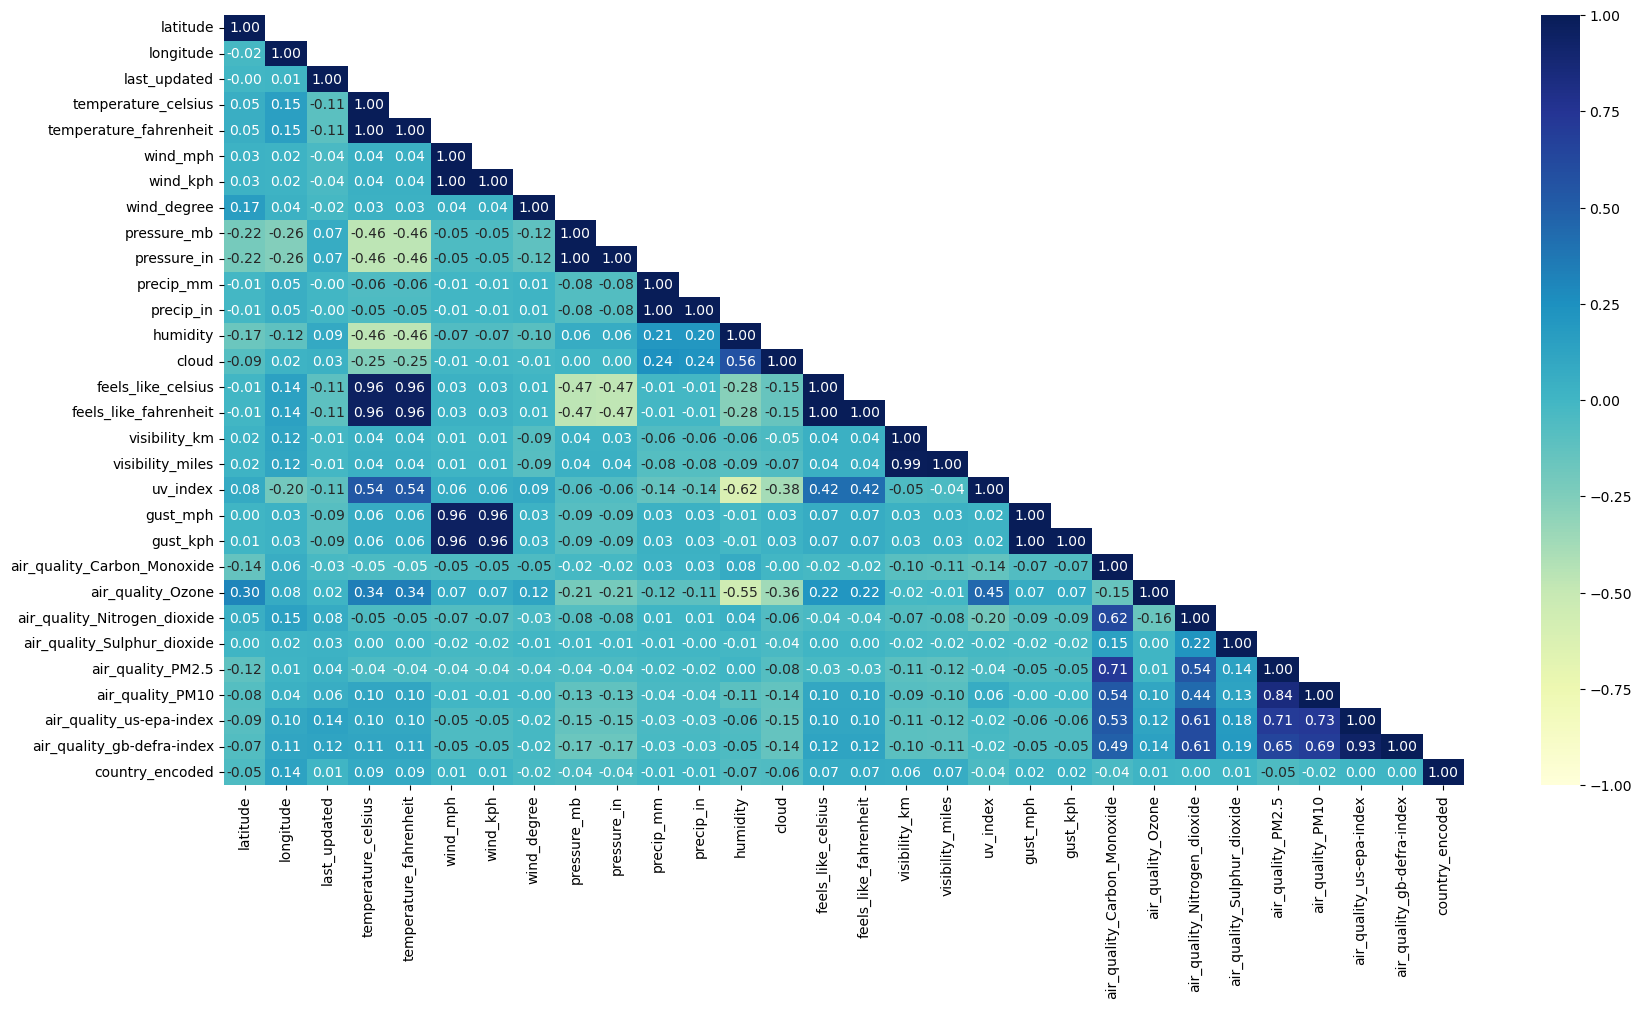

In [293]:
# Plotting a heatmap

corr = df_hot_enconded.corr()
corr_matrix = df_hot_enconded.corr()
plt.figure(figsize=(20,10))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
heat_map = sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, fmt='.2f',cmap='YlGnBu')


I have decided to encode the 'country' feature so I could apply the heatmap and then clean even more the dataset, through this heat map I can see there are still redundant columns, for instance, the wind speed, in km and mph, or the temperature, I will keep the speed in km and temperature in celcius. In addition, columns which has no strong correlation will be dropped as well.

In [294]:
# Dropping columns
df_hot_enconded = df_hot_enconded.drop(['temperature_fahrenheit', 'wind_mph', 'pressure_mb', 'pressure_in', 'feels_like_fahrenheit', 'visibility_miles', 'gust_mph','air_quality_Nitrogen_dioxide',
              'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'precip_in'], axis=1)

## Handling Outliers

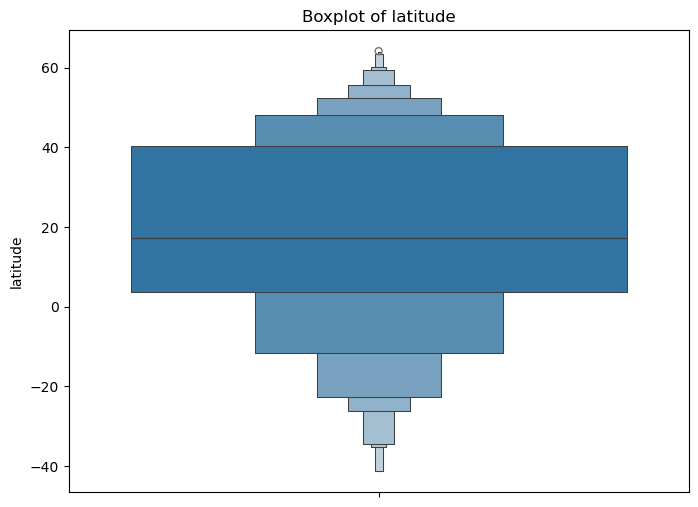

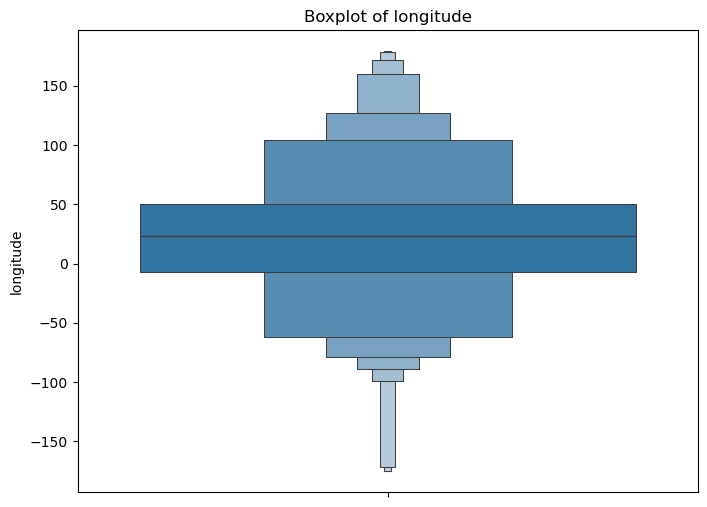

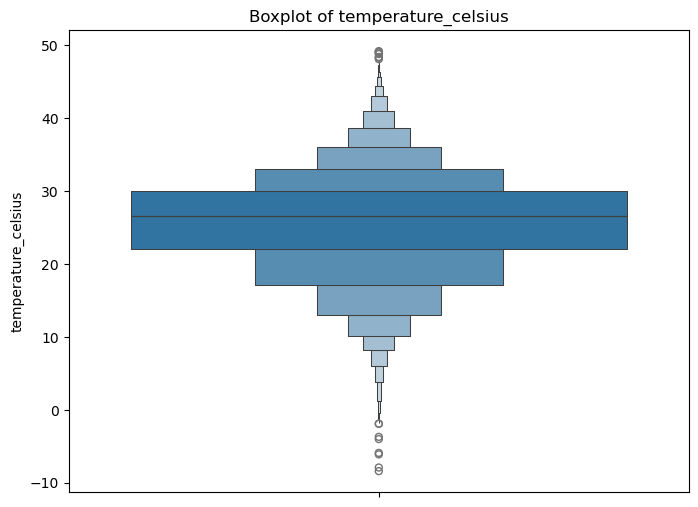

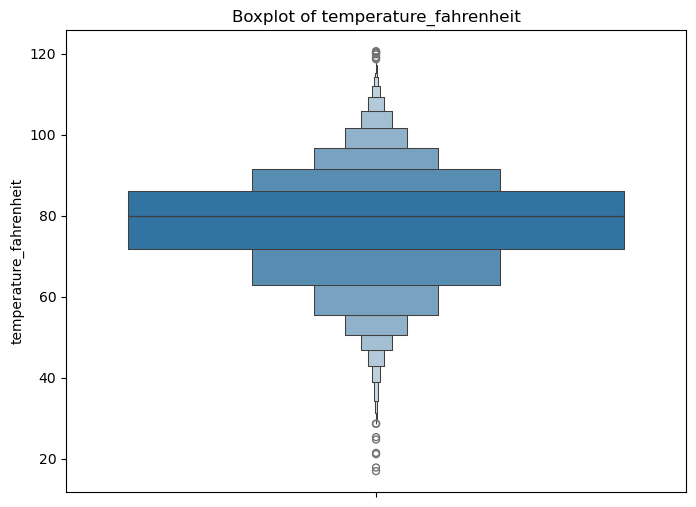

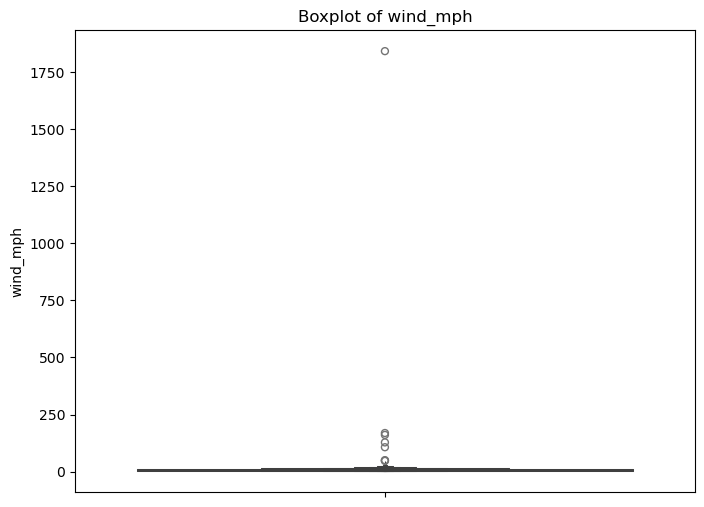

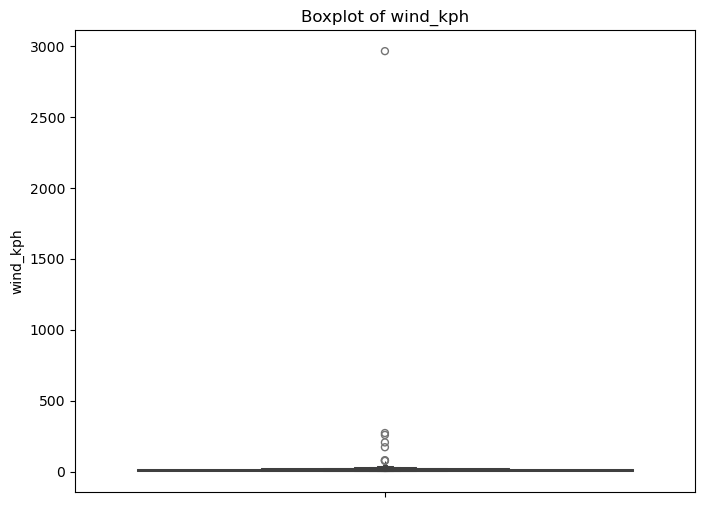

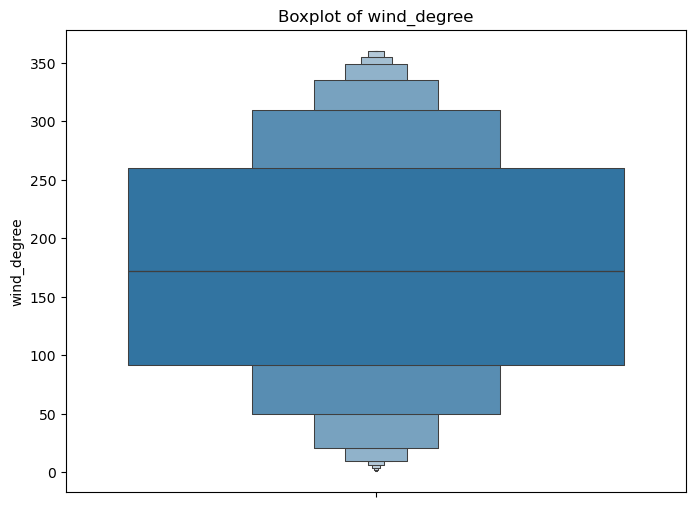

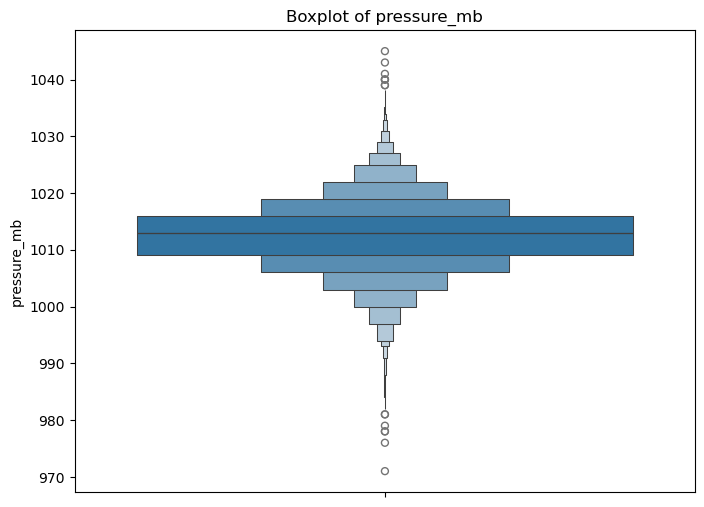

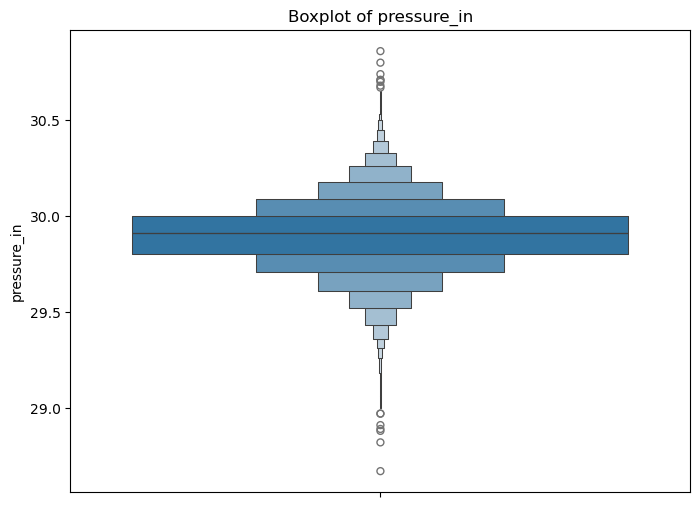

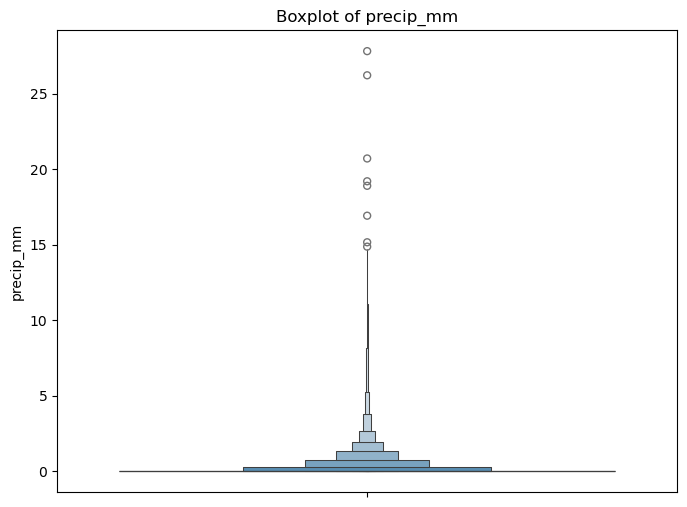

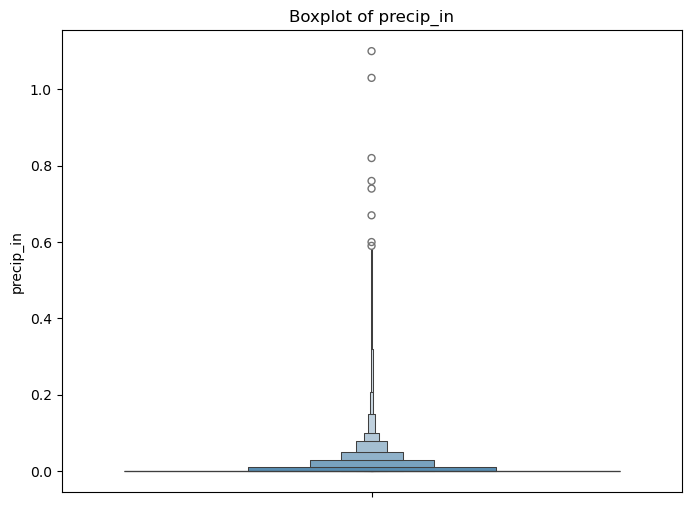

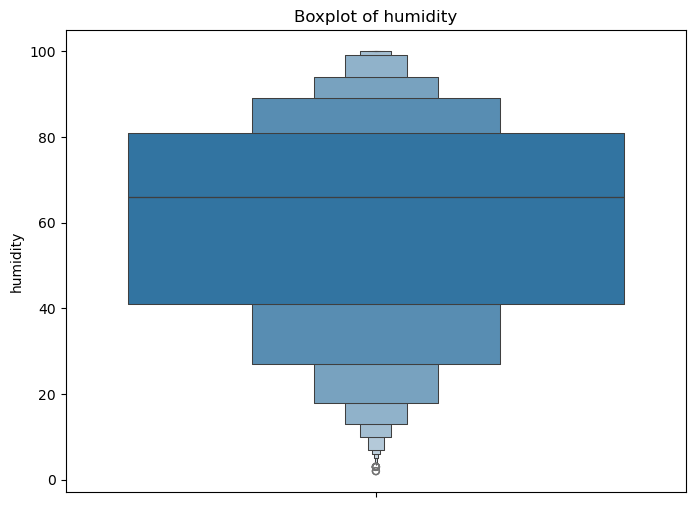

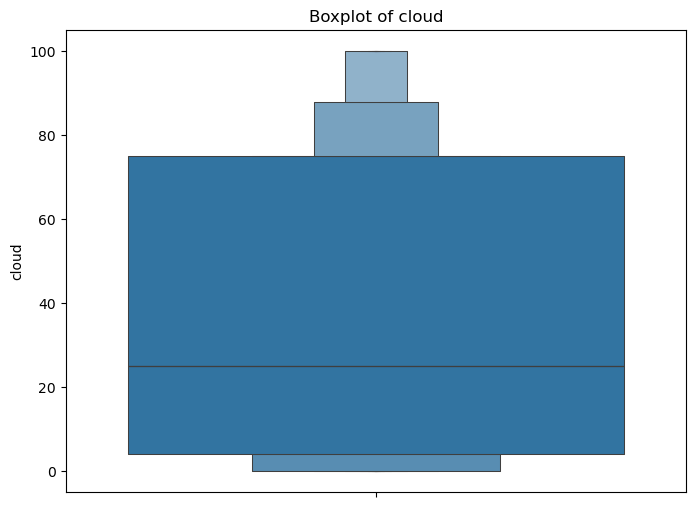

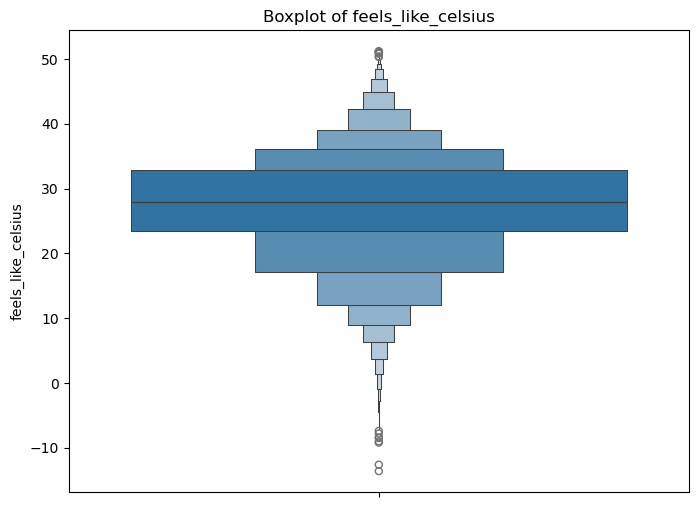

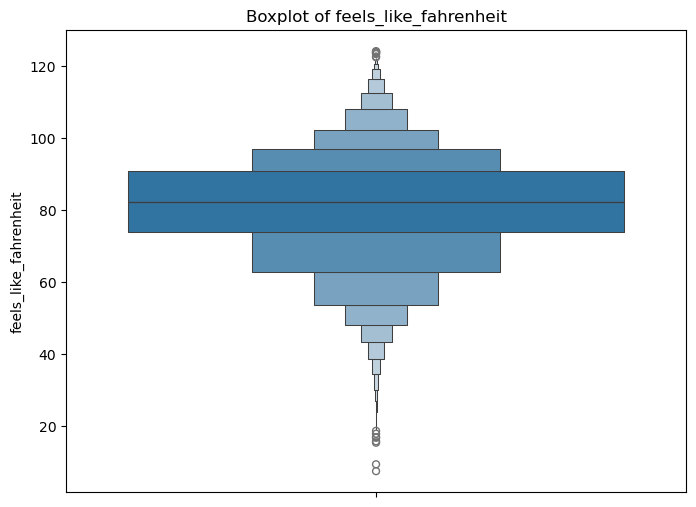

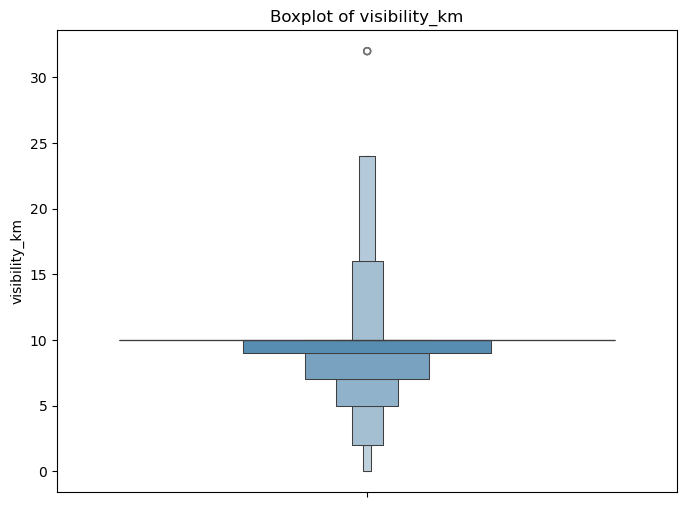

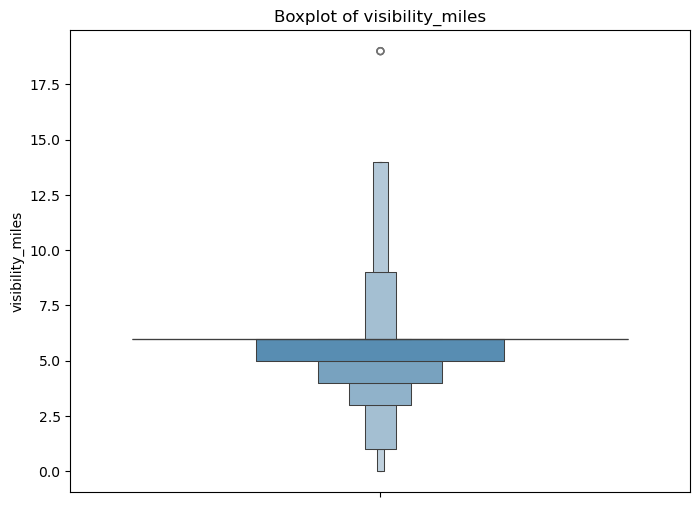

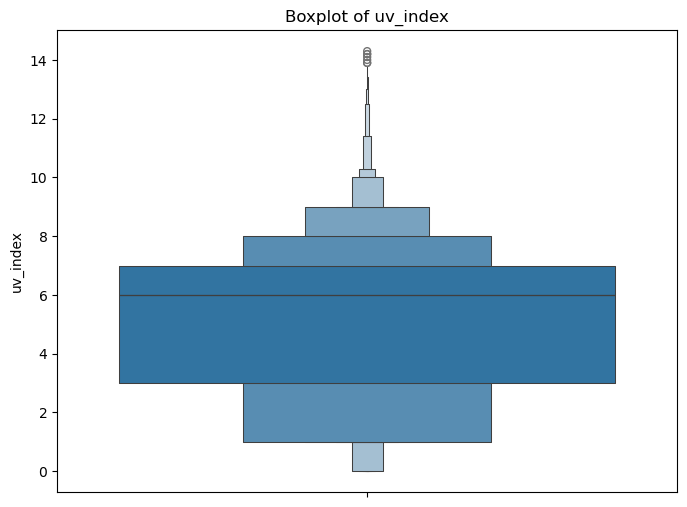

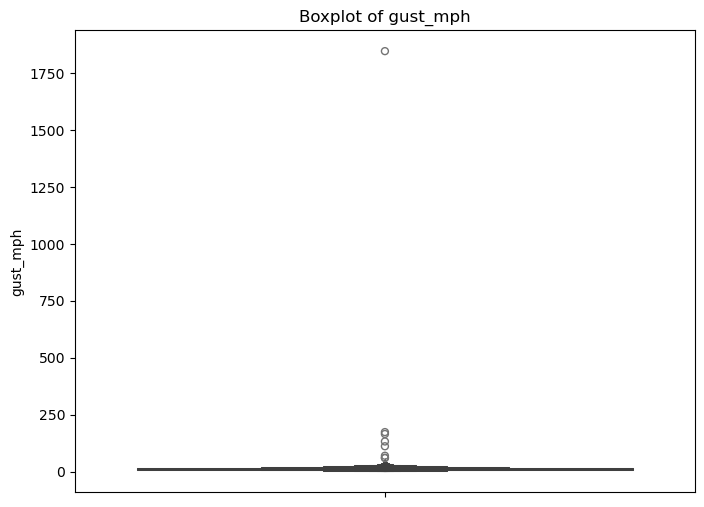

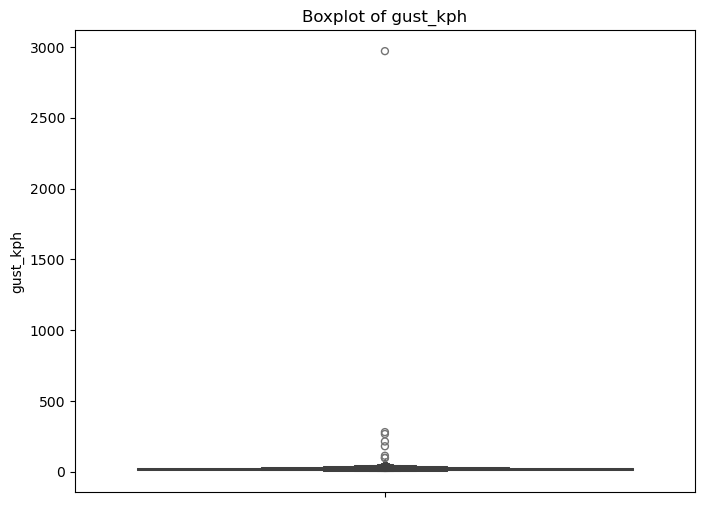

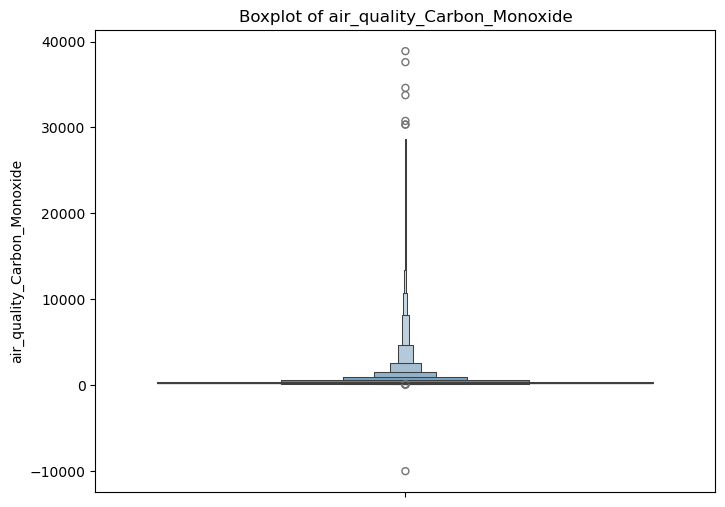

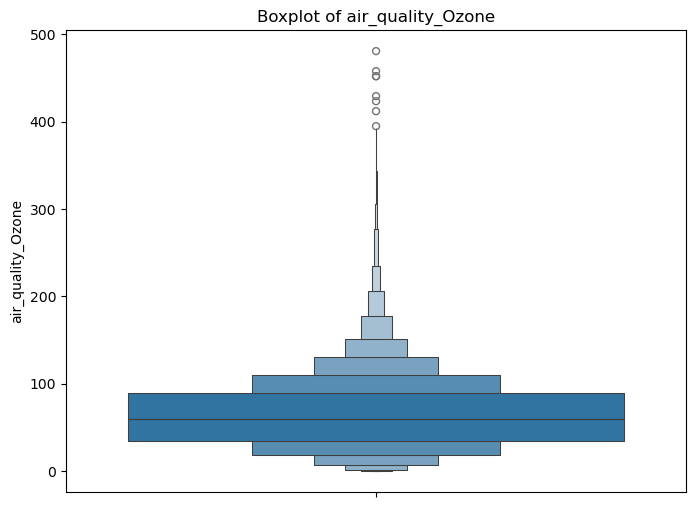

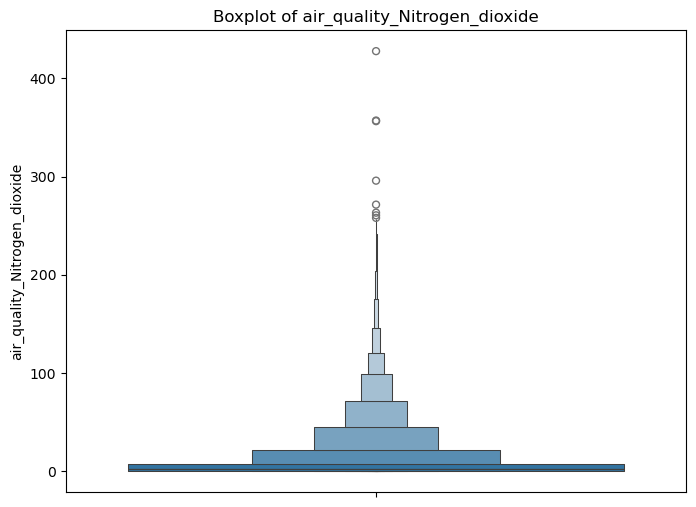

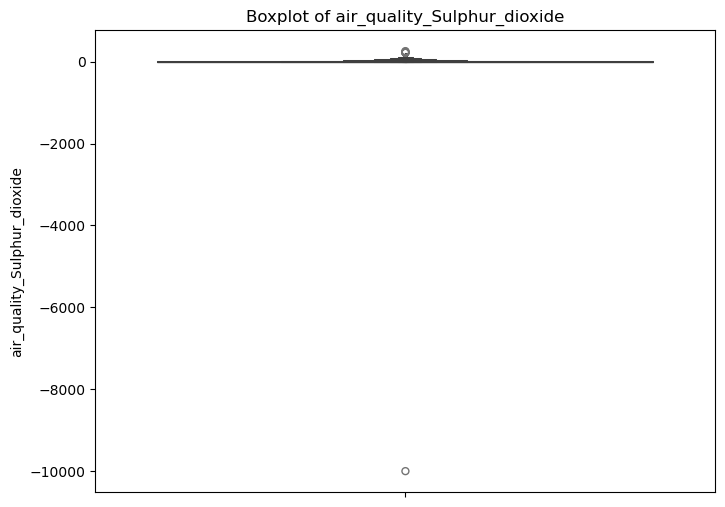

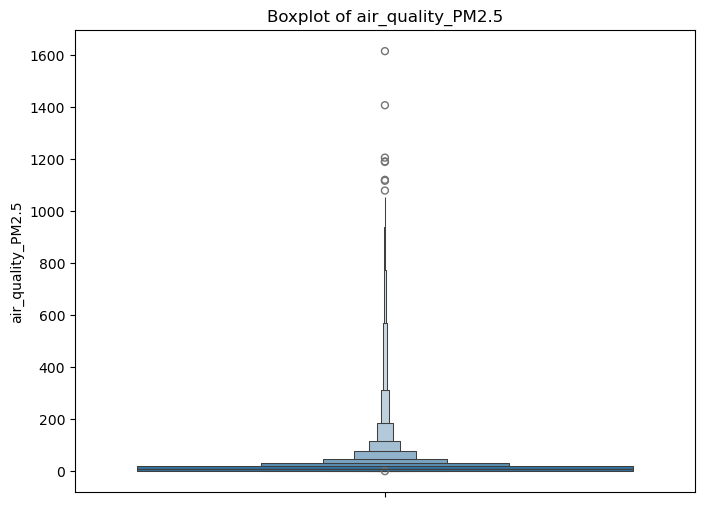

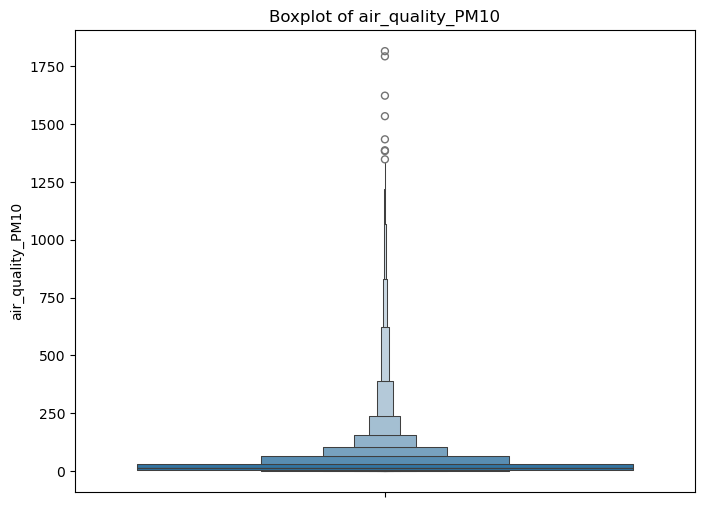

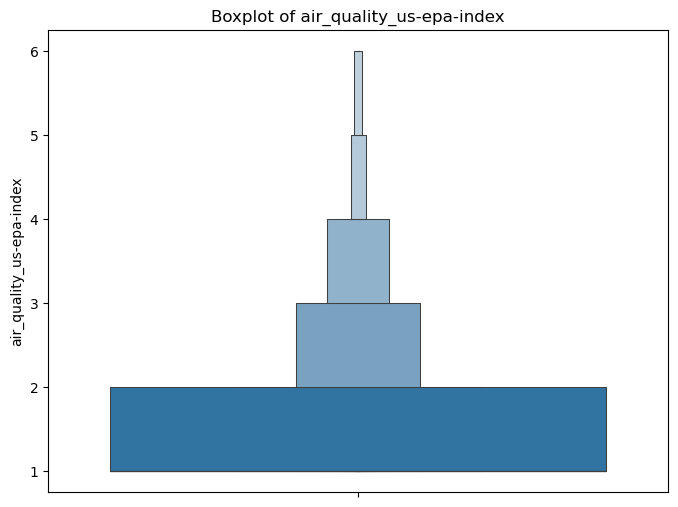

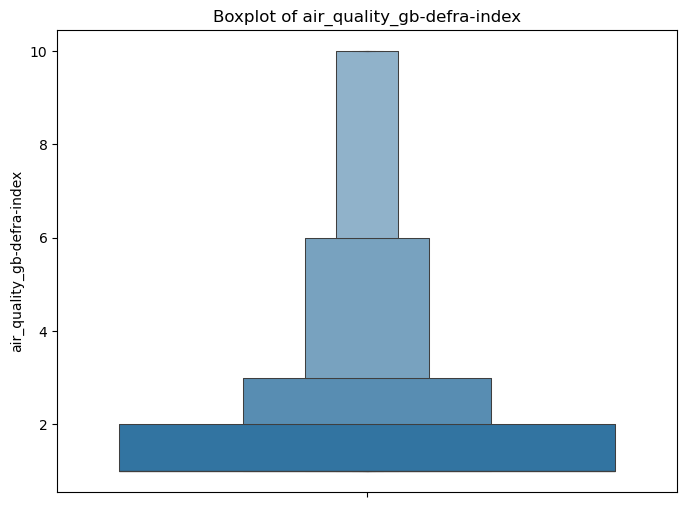

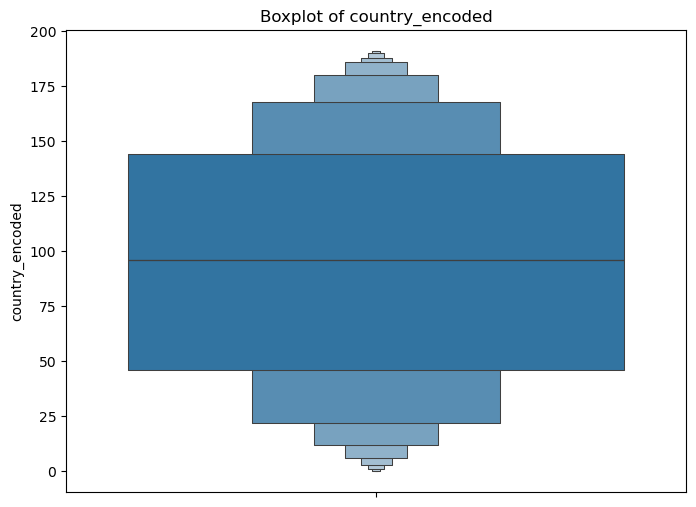

In [295]:
# Checking for outliers in the numeric columns.

columns_numeric = df.select_dtypes(include=['Float64', 'int64'])

for col in columns_numeric:
    plt.figure(figsize=(8,6))
    sns.boxenplot(y=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show() 

In [296]:
# Applying the interquartile range system to selec and drop the outliers in column 'wind_kph'

Q1= df['wind_kph'].quantile(0.25)
Q3= df['wind_kph'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_cleaned = df[(df['wind_kph'] >= lower) & (df['wind_kph'] <= upper)]

In [297]:
# Applying the interquartile range system to selec and drop the outliers in column 'visibility_km'
Q1= df['visibility_km'].quantile(0.25)
Q3= df['visibility_km'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_cleaned = df[(df['visibility_km'] >= lower) & (df['visibility_km'] <= upper)]

In [298]:
# Applying the interquartile range system to selec and drop the outliers in column 'gust_kph'
Q1= df['gust_kph'].quantile(0.25)
Q3= df['gust_kph'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_cleaned = df[(df['gust_kph'] >= lower) & (df['gust_kph'] <= upper)]

In [299]:
# Cheking the number of features and observations of the cleaned dataset
df_cleaned.shape

(29764, 31)

After plotting the boxplot, I detected 3 features containing outliers. Thus, I used the interquartile range technique to eliminate the outliers in those columns. This statistical technique consists of taking the difference between the third quartile and the first one from a group of data then it measures the central dispersion of the data, eliminating the outliers. (Hleap, 2024)

## Storing the clean dataset in a new file

In [300]:
# Exporting the dataset for a new csv file

df_cleaned.to_csv('/Users/diegolemos/Masters/ProgrammingForAi/CA/Cleaned_Global_Weather.csv', index=False)

In [301]:
# Reading and assigning the new dataset to the 'df' vatiable
df_weather = pd.read_csv('/Users/diegolemos/Masters/ProgrammingForAi/CA/Cleaned_Global_Weather.csv')

In [302]:
# Reading the 5 first rows of the dataset
df_weather.head()

,country,latitude,longitude,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,country_encoded
0,Afghanistan,34.52,69.18,2024-05-16 13:15:00,26.6,79.8,8.3,13.3,338,1012.0,...,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,0
1,Albania,41.33,19.82,2024-05-16 10:45:00,19.0,66.2,6.9,11.2,320,1012.0,...,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,1
2,Algeria,36.76,3.05,2024-05-16 09:45:00,23.0,73.4,9.4,15.1,280,1011.0,...,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,2
3,Andorra,42.50,1.52,2024-05-16 10:45:00,6.3,43.3,7.4,11.9,215,1007.0,...,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,3
4,Angola,-8.84,13.23,2024-05-16 09:45:00,26.0,78.8,8.1,13.0,150,1011.0,...,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,4


## Measures of Variability

In [303]:
# Displying the summary of the key statistics features
df_weather.describe()

,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,country_encoded
count,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,...,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000
mean,19.160692,21.942271,25.729153,78.314098,8.266278,13.307361,175.640069,1012.529264,29.899287,0.152658,...,19.493391,463.961074,64.659454,10.201359,7.372787,17.938463,33.057955,1.439591,1.970367,94.799456
std,24.376179,65.318143,7.112314,12.802249,4.760060,7.660297,100.025001,6.130571,0.180690,0.578329,...,9.789464,1076.823217,42.457907,22.656187,60.699483,48.611522,73.436287,0.819503,1.985583,56.134703
min,-41.300000,-175.200000,-8.400000,16.900000,2.200000,3.600000,1.000000,976.000000,28.820000,0.000000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.370000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,22.100000,71.800000,4.300000,6.800000,92.000000,1009.000000,29.800000,0.000000,...,11.300000,205.300000,34.000000,0.600000,0.500000,2.900000,5.200000,1.000000,1.000000,46.000000
50%,17.250000,23.320000,26.600000,79.900000,7.400000,11.900000,172.000000,1013.000000,29.910000,0.000000,...,18.400000,264.550000,60.000000,2.035000,1.500000,7.955000,13.500000,1.000000,1.000000,96.000000
75%,40.400000,49.880000,30.000000,86.000000,11.900000,19.100000,259.000000,1016.000000,30.000000,0.030000,...,26.300000,403.300000,90.000000,7.955000,5.500000,18.400000,32.375000,2.000000,2.000000,145.000000
max,64.150000,179.220000,49.200000,120.600000,28.600000,46.100000,360.000000,1045.000000,30.860000,19.200000,...,48.500000,38879.398000,480.700000,427.700000,255.855000,1614.100000,1814.400000,6.000000,10.000000,191.000000


Using the function .describe() to obtain the distribution of variables, including mean, median, min, max, and the different quartiles. Transpose used to provide a better visualisation. (pandas.pydata.org, n.d.)